# 线性回归从零开始实现

In [26]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 根据带有噪声的线性模型构造一个人造数据集。我们使用线性模型参数$W = [2, -3.4]^T$ , $b = 4.2$ 和噪声e生成数据集极其标签： $$ y = Xw + b + e $$

In [3]:
def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,(num_examples, len(w))) # torch.normal(mean = ,std = ,size = (,))
    y = torch.matmul(x,w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print("features:", features[0],'\nlabel:', labels[0])

features: tensor([ 2.2474, -0.3682]) 
label: tensor([9.9306])


### `features` 中的每一行都包含一个二维数据样本， `labels`中的每一行都包含一维标签值（一个标量）

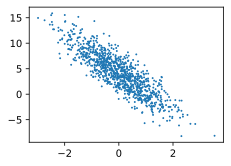

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1)

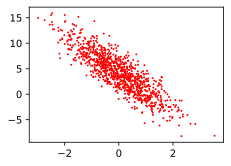

In [14]:
import matplotlib.pyplot as plt
#plt.plot(features[:,1].detach().numpy(), labels.detach().numpy(),"ro", ms = 3)
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(),s = 1,c = "red") # s: size of the plot, c: color
plt.show()

### 定义一个`data_iter`函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量

In [18]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # randomly read samples
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x,"\n",y)
    break

tensor([[ 0.7687, -1.8728],
        [ 1.5124, -0.1157],
        [ 0.2258,  0.2535],
        [ 2.5338, -0.1305],
        [ 1.6188, -1.9882],
        [ 0.3187, -2.2269],
        [-1.3186,  0.6513],
        [-0.4416, -1.7337],
        [ 0.4294,  0.4147],
        [ 0.9856, -0.1043]]) 
 tensor([[12.0964],
        [ 7.6292],
        [ 3.7874],
        [ 9.7066],
        [14.1968],
        [12.4005],
        [-0.6517],
        [ 9.1856],
        [ 3.6434],
        [ 6.5468]])


### 定义初始化模型参数

In [19]:
w = torch.normal(0,0.01, size = (2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

### 定义模型

In [21]:
def linreg(x,w,b):
    return torch.matmul(x,w)+b

### 定义损失函数

In [24]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

### 定义优化算法

In [22]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

### 训练过程

In [30]:
lr = 1
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000055
epoch 2, loss 0.000063
epoch 3, loss 0.000062


In [31]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差：tensor([ 0.0016, -0.0011], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0030], grad_fn=<RsubBackward1>)
